# Product Case Study:
## Categories Display Controlled Experiment (A/B Test)
### Author: Ci Zhang          
### Date: Feb 1 -- Feb 3, 2020 

To decide whether to apply a new version of the home page design, Viagogo is
doing A/B testing on incoming visitors to compare the performance of control and
variant groups. In the current version of the homepage (control group), the page
displays the ten most popular categories based on sales from all of our customers. The
new page (variant group) shows the ten categories nearest to the user’s location with
events this week. Incoming users are divided into these groups randomly. We want to
apply data analysis tools on the two groups of customers and study their shopping
behaviors.

In [2]:
from scipy import stats
import pandas as pd

df = pd.read_excel('Spring 2018 - Product Case Data.xlsx', index_col=0)
df.head()

,Channel,User Type,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
Date,,,,,,,
2014-10-10,Affiliate,Returning User,0,0,0,1211,1175
2014-10-10,Affiliate,Returning User,1,0,0,4076,4810
2014-10-10,Affiliate,Returning User,1,1,0,2766,3386
2014-10-10,Affiliate,Returning User,0,0,1,196,159
2014-10-10,Affiliate,Returning User,1,0,1,358,332


### problem 1

Based on the data collected during the 21 days from 2014-10-10 to 2014-10-30, I
analyzed the time-variant conversion rates, bounce rates for the two groups and ran the
statistics t-test. To understand the differences between the two-group users' behavior
from different channels and returning types, I also analyzed the two rates separately for
different kinds of users.

The conversion rate is the percentage of users who make a purchase. The bounce
rate is the percentage of users who left the website rather than continuing to view other
pages. Generally, higher conversion rates and lower bounce rates indicate better user
experience and business performance. The aggregated conversion rate of total Viagogo
visitors and two groups visitors are as follow:

In [187]:
# Conversion rate for Control and Variant groups\
num_control_total = sum(df['Visitors_Control'])
num_variant_total = sum(df['Visitors_Variant'])
df_purchased = df[df['Purchase']==1]
conversion_rate_control = sum(df_purchased['Visitors_Control']) / num_control_total
conversion_rate_variant = sum(df_purchased['Visitors_Variant']) / num_variant_total
relative_difference_cr = (conversion_rate_variant - conversion_rate_control) / conversion_rate_control

total_conversion_rate = (sum(df_purchased['Visitors_Control']) + sum(df_purchased['Visitors_Variant'])) / (num_control_total + num_variant_total)
print("total conversion rate is : " + str(round(total_conversion_rate*100, 3)) + " %")
print("conversion_rate_control is : " + str(round(conversion_rate_control * 100, 3)) + " %")
print("conversion_rate_variant is : " + str(round(conversion_rate_variant * 100, 3)) + " %")
print("relative_difference of conversion rate is : " + str(round(relative_difference_cr * 100, 3)) + " %")

total conversion rate is : 5.431 %
conversion_rate_control is : 5.558 %
conversion_rate_variant is : 5.305 %
relative_difference of conversion rate is : -4.554 %


### problem 2

In [188]:
# Check there is no case where land = 0 while bounce = 1
df_landed =  df[df['Land']==1]
df_bounced = df[df['Bounce']==1]
bounce_without_land = df[(df['Land']==0) & (df['Bounce']==1)].count()
print("bounced without landing : \n" + str(bounce_without_land))

# Bounce rate for Control and Variant groups\
num_control_land = sum(df_landed['Visitors_Control'])
num_variant_land = sum(df_landed['Visitors_Variant'])
bounce_rate_control = sum(df_bounced['Visitors_Control']) / num_control_land
bounce_rate_variant = sum(df_bounced['Visitors_Variant']) / num_variant_land
relative_difference_br = (bounce_rate_variant - bounce_rate_control) / bounce_rate_control
bounce_rate_total = (sum(df_bounced['Visitors_Control'])+ sum(df_bounced['Visitors_Variant'])) / (num_control_land + num_variant_land)

print("======================")
print("bounce_rate_total is : " + str(round( bounce_rate_total* 100, 3)) + " %")
print("bounce_rate_control is : " + str(round(bounce_rate_control * 100, 3)) + " %")
print("bounce_rate_variant is : " + str(round(bounce_rate_variant * 100, 3)) + " %")
print("relative_difference of bounce rate is : " + str(round(relative_difference_br * 100, 3)) + " %")

bounced without landing : 
Channel             0
User Type           0
Land                0
Bounce              0
Purchase            0
Visitors_Control    0
Visitors_Variant    0
dtype: int64
bounce_rate_total is : 40.472 %
bounce_rate_control is : 39.664 %
bounce_rate_variant is : 41.266 %
relative_difference of bounce rate is : 4.037 %


To get the insights of time-variant conversion rates and bounce rates, two
quantitative values are analyzed based on different dates:

In [190]:
import matplotlib.pyplot as plt 
import numpy as np 
dates = df.index.unique()

group1 = df.groupby([df.index, "Purchase"]).sum()["Visitors_Control"]
control_no_buy = group1.xs(0, level='Purchase')
control_buy = group1.xs(1, level='Purchase')
control_conversion_rate = control_buy / (control_buy + control_no_buy)

group2 = df.groupby([df.index, "Purchase"]).sum()["Visitors_Variant"]
variant_no_buy = group2.xs(0, level='Purchase')
variant_buy = group2.xs(1, level='Purchase')
variant_conversion_rate = variant_buy / (variant_no_buy + variant_buy)


group5 = df.groupby([df.index, 'Bounce']).sum()["Visitors_Control"]
group5_ = df.groupby([df.index, 'Land']).sum()["Visitors_Control"]
control_land = group5_.xs(1, level='Land')
control_bounce = group5.xs(1, level='Bounce')
control_bounce_rate = control_bounce / control_land

group6 = df.groupby([df.index, 'Bounce']).sum()["Visitors_Variant"]
group6_ = df.groupby([df.index, 'Land']).sum()["Visitors_Variant"]
variant_land = group6_.xs(1, level='Land')
variant_bounce = group6.xs(1, level='Bounce')
variant_bounce_rate = variant_bounce / variant_land


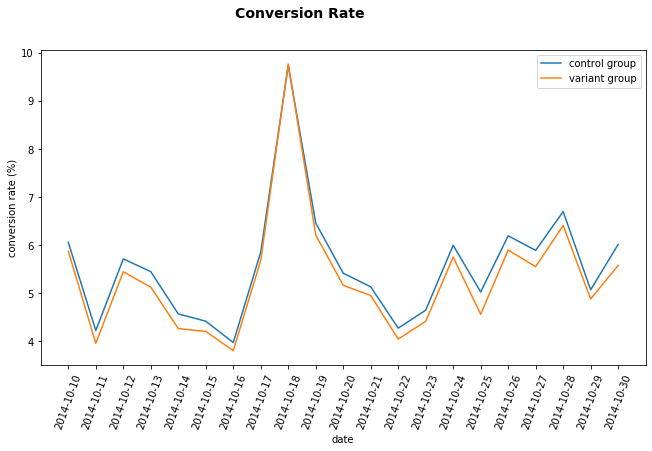

In [191]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dates, control_conversion_rate*100, label='control group')
ax.plot(dates, variant_conversion_rate*100, label='variant group')
ax.set_xlabel('date')
ax.set_ylabel('conversion rate (%)')
ax.set_xticks(dates)
ax.tick_params(axis='x', rotation=70)
fig.suptitle('Conversion Rate', fontsize=14, fontweight='bold')

plt.legend()

In [192]:
from sklearn import linear_model
control_conversion_rate.values
# a = [np.arange(len(dates))]
a = np.arange(len(dates)).reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(a, control_conversion_rate.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

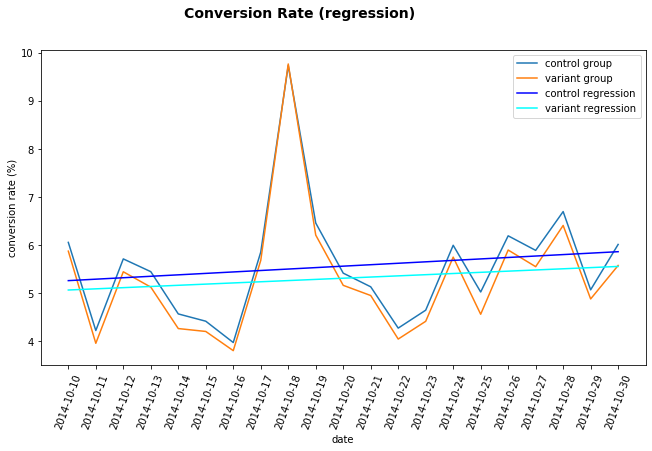

In [195]:
from sklearn import linear_model
model = linear_model.LinearRegression()
a = np.arange(len(dates)).reshape(-1, 1)
model.fit(a, control_conversion_rate.values*100)
pred_conversion_c = model.predict(a)
model.fit(a, variant_conversion_rate.values*100)
pred_conversion_v = model.predict(a)

fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dates, control_conversion_rate*100, label='control group')
ax.plot(dates, variant_conversion_rate*100, label='variant group')
ax.plot(dates, pred_conversion_c, linewidth=1.5, color="blue", label='control regression')
ax.plot(dates, pred_conversion_v, linewidth=1.5, color='cyan', label='variant regression')
ax.set_xlabel('date')
ax.set_ylabel('conversion rate (%)')
ax.set_xticks(dates)
ax.tick_params(axis='x', rotation=70)
fig.suptitle('Conversion Rate (regression)', fontsize=14, fontweight='bold')

plt.legend()

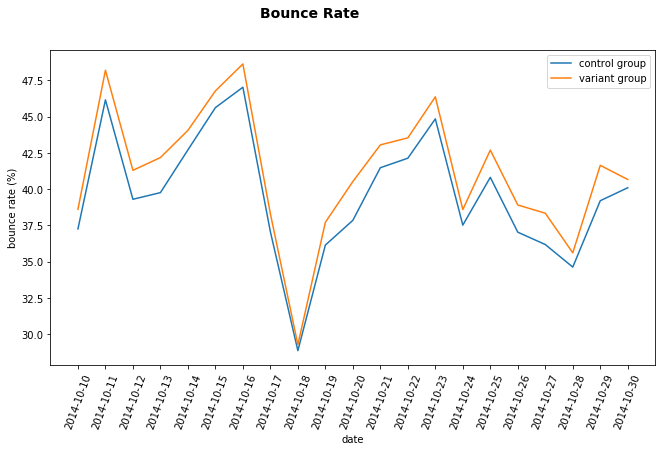

In [197]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dates, control_bounce_rate*100, label='control group')
ax.plot(dates, variant_bounce_rate*100, label='variant group')
ax.set_xlabel('date')
ax.set_ylabel('bounce rate (%)')
ax.set_xticks(dates)
ax.tick_params(axis='x', rotation=70)
fig.suptitle('Bounce Rate', fontsize=14, fontweight='bold')

plt.legend()

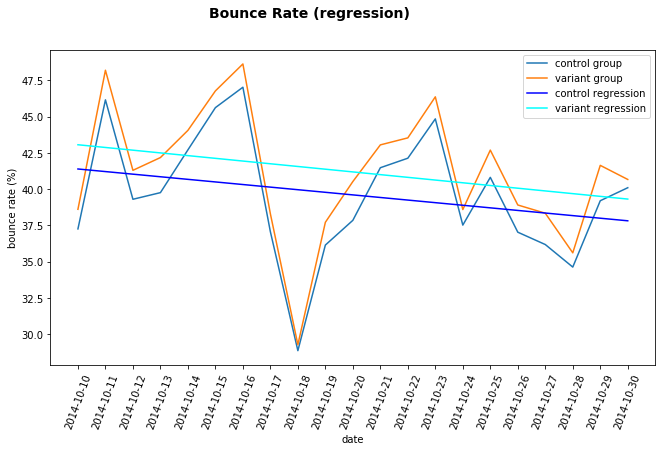

In [198]:
model = linear_model.LinearRegression()
a = np.arange(len(dates)).reshape(-1, 1)
model.fit(a, control_bounce_rate.values*100)
pred_bounce_c = model.predict(a)
model.fit(a, variant_bounce_rate.values*100)
pred_bounce_v = model.predict(a)

fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dates, control_bounce_rate*100, label='control group')
ax.plot(dates, variant_bounce_rate*100, label='variant group')
ax.set_xlabel('date')
ax.set_ylabel('bounce rate (%)')
ax.set_xticks(dates)
ax.tick_params(axis='x', rotation=70)
fig.suptitle('Bounce Rate (regression)', fontsize=14, fontweight='bold')
ax.plot(dates, pred_bounce_c, linewidth=1.5, color="blue", label='control regression')
ax.plot(dates, pred_bounce_v, linewidth=1.5, color='cyan', label='variant regression')
plt.legend()



//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


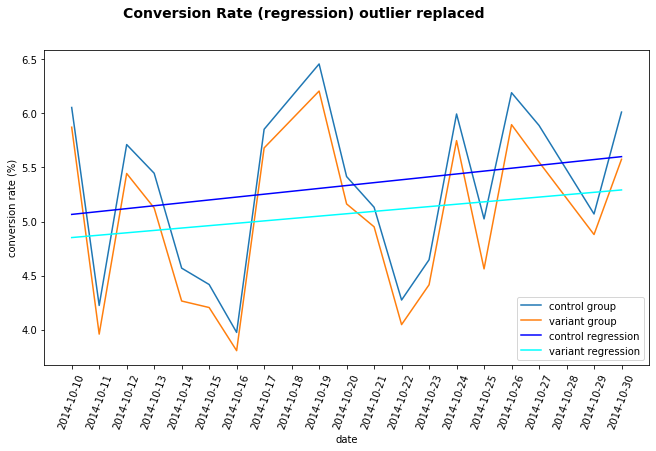

In [200]:
raw = control_conversion_rate.reset_index(drop=True)
outlier = np.argmax(raw)

control_conversion_rate.iloc[outlier] = (control_conversion_rate.iloc[outlier-1] +
                                         control_conversion_rate.iloc[outlier+1]) / 2
variant_conversion_rate.iloc[outlier] = (variant_conversion_rate.iloc[outlier-1] +
                                         variant_conversion_rate.iloc[outlier+1]) / 2


# np.argmax(control_conversion_rate)

model = linear_model.LinearRegression()
a = np.arange(len(dates)).reshape(-1, 1)
model.fit(a, control_conversion_rate.values*100)
pred_conversion_c = model.predict(a)
model.fit(a, variant_conversion_rate.values*100)
pred_conversion_v = model.predict(a)

fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dates, control_conversion_rate*100, label='control group')
ax.plot(dates, variant_conversion_rate*100, label='variant group')
ax.plot(dates, pred_conversion_c, linewidth=1.5, color="blue", label='control regression')
ax.plot(dates, pred_conversion_v, linewidth=1.5, color='cyan', label='variant regression')
ax.set_xlabel('date')
ax.set_ylabel('conversion rate (%)')
ax.set_xticks(dates)
ax.tick_params(axis='x', rotation=70)
fig.suptitle('Conversion Rate (regression) outlier replaced', fontsize=14, fontweight='bold')

plt.legend()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


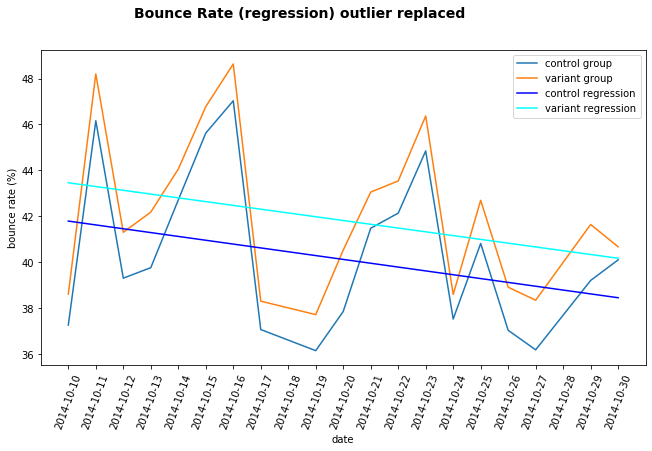

In [202]:
raw = control_bounce_rate.reset_index(drop=True)
outlier = np.argmin(raw)

control_bounce_rate.iloc[outlier] = (control_bounce_rate.iloc[outlier-1] +
                                         control_bounce_rate.iloc[outlier+1]) / 2
variant_bounce_rate.iloc[outlier] = (variant_bounce_rate.iloc[outlier-1] +
                                         variant_bounce_rate.iloc[outlier+1]) / 2

model = linear_model.LinearRegression()
a = np.arange(len(dates)).reshape(-1, 1)
model.fit(a, control_bounce_rate.values*100)
pred_bounce_c = model.predict(a)
model.fit(a, variant_bounce_rate.values*100)
pred_bounce_v = model.predict(a)

fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dates, control_bounce_rate*100, label='control group')
ax.plot(dates, variant_bounce_rate*100, label='variant group')
ax.set_xlabel('date')
ax.set_ylabel('bounce rate (%)')
ax.set_xticks(dates)
ax.tick_params(axis='x', rotation=70)
fig.suptitle('Bounce Rate (regression) outlier replaced', fontsize=14, fontweight='bold')
ax.plot(dates, pred_bounce_c, linewidth=1.5, color="blue", label='control regression')
ax.plot(dates, pred_bounce_v, linewidth=1.5, color='cyan', label='variant regression')
plt.legend()



From †he plots above, we can see that during the selected period, the control
group had better business performance since its conversion rates were higher while the
bounce rate is lower. To avoid the accidental results of the two groups, I ran a t-test to
learn whether there is a significant difference between the two groups. The results
(small p-values not greater than ) for t-test convey that, in terms of both rates, the
control group differs from the variant rate.

In [135]:
stats.ttest_rel(control_conversion_rate, variant_conversion_rate)

Ttest_relResult(statistic=11.288184714174914, pvalue=3.974215059907955e-10)

In [136]:
stats.ttest_rel(control_bounce_rate, variant_bounce_rate)

Ttest_relResult(statistic=-12.28487748479232, pvalue=8.971333343927108e-11)

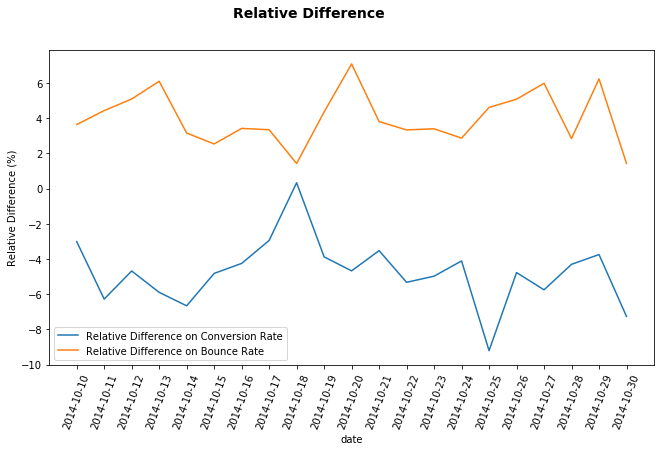

In [152]:
relative_difference_cr = (variant_conversion_rate - control_conversion_rate) / control_conversion_rate
relative_difference_br = (variant_bounce_rate - control_bounce_rate) / control_bounce_rate
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dates, relative_difference_cr*100, label = 'Relative Difference on Conversion Rate')
ax.plot(dates, relative_difference_br*100, label = 'Relative Difference on Bounce Rate')
ax.set_xlabel('date')
ax.set_xticks(dates)
ax.tick_params(axis='x', rotation=70)
ax.set_ylabel('Relative Difference (%)')
fig.suptitle('Relative Difference', fontsize=14, fontweight='bold')

plt.legend()

### Problem 4

### Channel Analysis

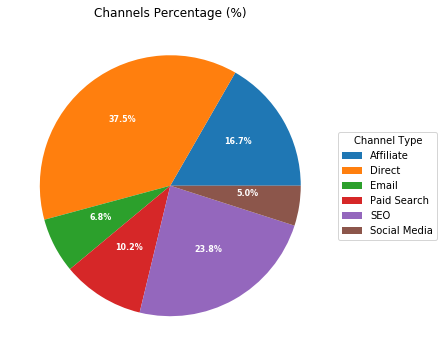

Channel
Affiliate       1008819
Direct          2265890
Email            413493
Paid Search      615391
SEO             1439487
Social Media     299110
dtype: int64

In [138]:
# Study the behavior of visitors coming from different channel

group1 = df.groupby(['Channel']).sum()['Visitors_Control']
group2 = df.groupby(['Channel']).sum()['Visitors_Variant']
num_visitors_by_c = group1 + group2

def plot_a_pie_chart(data, names, title):
    fig, ax = plt.subplots(figsize=(12,6), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: "{:.1f}%\n ".format(pct),
                                  textprops=dict(color="w"))
    ax.legend(wedges, names,
          title='Channel Type',
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title(title)
    plt.show()

channels = list(num_visitors_by_c.index)
data = [num_visitors_by_c[x] for x in channels]
title = "Channels Percentage (%)"
plot_a_pie_chart(data, channels, title)
num_visitors_by_c

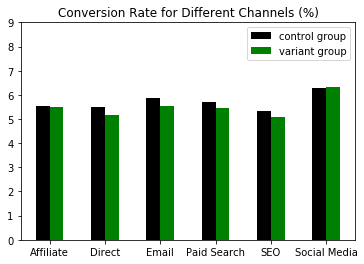

In [174]:
# Find Conversion Rate for different channels (Control AND Variant)

buy_control_by_c = df[df['Purchase']==1].groupby('Channel').sum()['Visitors_Control']
all_control_by_c = df.groupby('Channel').sum()["Visitors_Control"]
buy_variant_by_c = df[df['Purchase']==1].groupby('Channel').sum()['Visitors_Variant']
all_variant_by_c = df.groupby('Channel').sum()['Visitors_Variant']

control_by_c = (buy_control_by_c/all_control_by_c)*100
variant_by_c = (buy_variant_by_c/all_variant_by_c)*100

X = np.arange(6)
plt.bar(X + 0.00, control_by_c, color='k', width=0.25, label='control group')
plt.bar(X + 0.25, variant_by_c, color='g', width=0.25, label='variant group')
plt.xticks(X + 0.25/2, channels)
plt.title("Conversion Rate for Different Channels (%)")
plt.ylim(0,9)
plt.legend()
plt.show()

In [175]:
variant_by_c

Channel
Affiliate       5.492781
Direct          5.167054
Email           5.534495
Paid Search     5.435333
SEO             5.062640
Social Media    6.314234
Name: Visitors_Variant, dtype: float64

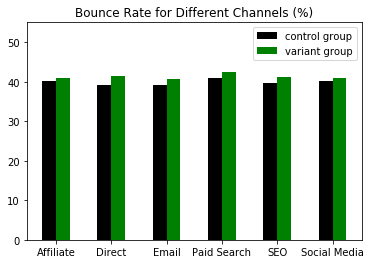

In [172]:
# Find Bounce Rate for different channels (Control AND Variant)

bounce_control_by_c = df[df['Bounce']==1].groupby("Channel").sum()["Visitors_Control"]
land_control_by_c = df[df['Land']==1].groupby("Channel").sum()["Visitors_Control"]
bounce_variant_by_c = df[df['Bounce']==1].groupby("Channel").sum()["Visitors_Variant"]
land_variant_by_c = df[df['Land']==1].groupby("Channel").sum()["Visitors_Variant"]

y = (bounce_control_by_c/land_control_by_c)*100
z = (bounce_variant_by_c/land_variant_by_c)*100

X = np.arange(6)
plt.bar(X+0.00, y, color='k', width=0.25, label='control group')
plt.bar(X+0.25, z, color='g', width=0.25, label='variant group')
plt.xticks(X + 0.25/2, (channels))
plt.title('Bounce Rate for Different Channels (%)')
plt.ylim(0,55)
plt.legend()

### Users Type (Returning) Analysis

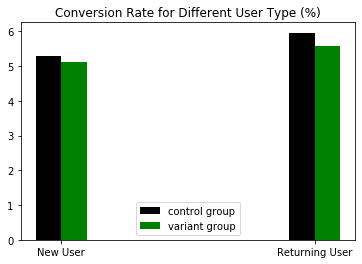

In [203]:
buy_control_by_returning = df[df['Purchase']==1].groupby("User Type").sum()["Visitors_Control"]
all_control_by_returning = df.groupby("User Type").sum()["Visitors_Control"]
buy_variant_by_returning = df[df['Purchase']==1].groupby("User Type").sum()["Visitors_Variant"]
all_variant_by_returning = df.groupby("User Type").sum()["Visitors_Variant"]

user_types = ['New User', 'Returning User']

y = (buy_control_by_returning/all_control_by_returning)*100
z = (buy_variant_by_returning/all_variant_by_returning)*100


X = np.arange(2)
plt.bar(X+0.00, y, color='k', width=0.10, label="control group")
plt.bar(X+0.10, z, color='g', width=0.10, label="variant group")
plt.xticks(X + 0.10/2, user_types)
plt.title("Conversion Rate for Different User Type (%)")

plt.legend()

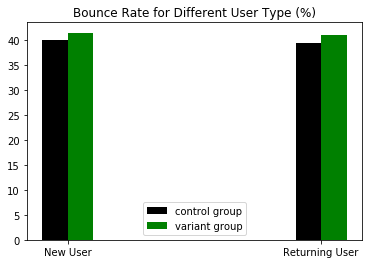

In [204]:
bounce_control_by_returning = df[df['Bounce']==1].groupby("User Type").sum()["Visitors_Control"]
land_control_by_returning = df[df['Land']==1].groupby("User Type").sum()["Visitors_Control"]
bounce_variant_by_returning = df[df['Bounce']==1].groupby("User Type").sum()["Visitors_Variant"]
land_variant_by_returning = df[df['Land']==1].groupby("User Type").sum()["Visitors_Variant"]

user_types = ['New User', 'Returning User']

y = (bounce_control_by_returning/land_control_by_returning)*100
z = (bounce_variant_by_returning/land_variant_by_returning)*100


X = np.arange(2)
plt.bar(X+0.00, y, color='k', width=0.10, label="control group")
plt.bar(X+0.10, z, color='g', width=0.10, label="variant group")
plt.xticks(X + 0.10/2, user_types)
plt.title("Bounce Rate for Different User Type (%)")

plt.legend()

In [205]:
(buy_control_by_returning/all_control_by_returning)*100

User Type
New User          5.284666
Returning User    5.957442
Name: Visitors_Control, dtype: float64

In [206]:
(buy_variant_by_returning/all_variant_by_returning)*100

User Type
New User          5.119057
Returning User    5.583788
Name: Visitors_Variant, dtype: float64

### Special Day 2014-10-18 Analysis 

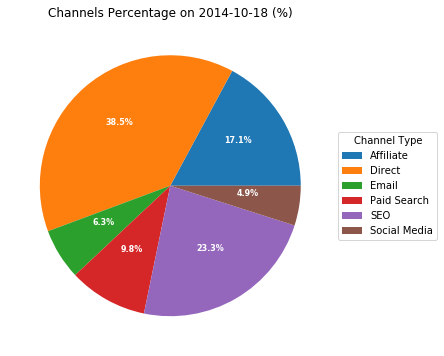

Channel
Affiliate        53609
Direct          120613
Email            19817
Paid Search      30535
SEO              72963
Social Media     15414
dtype: int64

In [207]:
df_special_day = df[df.index=='2014-10-18']
group1 = df_special_day.groupby(['Channel']).sum()['Visitors_Control']
group2 = df_special_day.groupby(['Channel']).sum()['Visitors_Variant']
num_visitors_by_c = group1 + group2

def plot_a_pie_chart(data, names, title):
    fig, ax = plt.subplots(figsize=(12,6), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: "{:.1f}%\n ".format(pct),
                                  textprops=dict(color="w"))
    ax.legend(wedges, names,
          title='Channel Type',
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title(title)
    plt.show()

channels = list(num_visitors_by_c.index)
data = [num_visitors_by_c[x] for x in channels]
title = "Channels Percentage on 2014-10-18 (%)"
plot_a_pie_chart(data, channels, title)
num_visitors_by_c

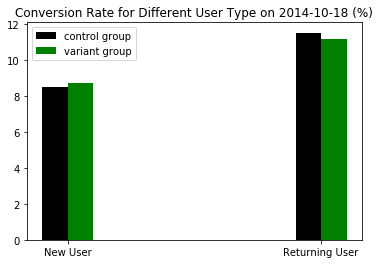

In [208]:
buy_control_by_returning = df_special_day[df_special_day['Purchase']==1].groupby("User Type").sum()["Visitors_Control"]
all_control_by_returning = df_special_day.groupby("User Type").sum()["Visitors_Control"]
buy_variant_by_returning = df_special_day[df_special_day['Purchase']==1].groupby("User Type").sum()["Visitors_Variant"]
all_variant_by_returning = df_special_day.groupby("User Type").sum()["Visitors_Variant"]

user_types = ['New User', 'Returning User']

y = (buy_control_by_returning/all_control_by_returning)*100
z = (buy_variant_by_returning/all_variant_by_returning)*100


X = np.arange(2)
plt.bar(X+0.00, y, color='k', width=0.10, label="control group")
plt.bar(X+0.10, z, color='g', width=0.10, label="variant group")
plt.xticks(X + 0.10/2, user_types)
plt.title("Conversion Rate for Different User Type on 2014-10-18 (%)")

plt.legend()

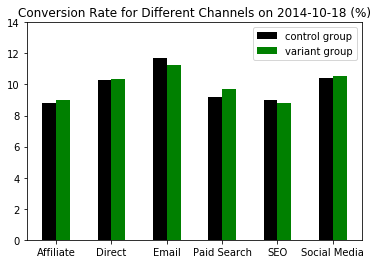

In [209]:
# Find Conversion Rate for different channels (Control AND Variant)

buy_control_by_c = df_special_day[df_special_day['Purchase']==1].groupby('Channel').sum()['Visitors_Control']
all_control_by_c = df_special_day.groupby('Channel').sum()["Visitors_Control"]
buy_variant_by_c = df_special_day[df_special_day['Purchase']==1].groupby('Channel').sum()['Visitors_Variant']
all_variant_by_c = df_special_day.groupby('Channel').sum()['Visitors_Variant']

control_by_c = (buy_control_by_c/all_control_by_c)*100
variant_by_c = (buy_variant_by_c/all_variant_by_c)*100

X = np.arange(6)
plt.bar(X + 0.00, control_by_c, color='k', width=0.25, label='control group')
plt.bar(X + 0.25, variant_by_c, color='g', width=0.25, label='variant group')
plt.xticks(X + 0.25/2, channels)
plt.title("Conversion Rate for Different Channels on 2014-10-18 (%)")
plt.ylim(0,14)
plt.legend()
plt.show()

In [210]:
control_by_c

Channel
Affiliate        8.827186
Direct          10.287538
Email           11.705924
Paid Search      9.210868
SEO              9.006586
Social Media    10.433534
Name: Visitors_Control, dtype: float64

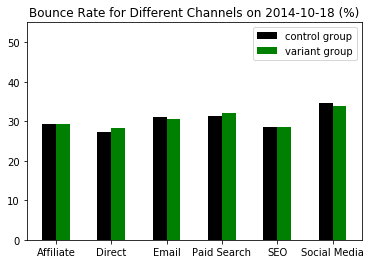

In [211]:
# Find Bounce Rate for different channels (Control AND Variant)

bounce_control_by_c = df_special_day[df_special_day['Bounce']==1].groupby("Channel").sum()["Visitors_Control"]
land_control_by_c = df_special_day[df_special_day['Land']==1].groupby("Channel").sum()["Visitors_Control"]
bounce_variant_by_c = df_special_day[df_special_day['Bounce']==1].groupby("Channel").sum()["Visitors_Variant"]
land_variant_by_c = df_special_day[df_special_day['Land']==1].groupby("Channel").sum()["Visitors_Variant"]

y = (bounce_control_by_c/land_control_by_c)*100
z = (bounce_variant_by_c/land_variant_by_c)*100

X = np.arange(6)
plt.bar(X+0.00, y, color='k', width=0.25, label='control group')
plt.bar(X+0.25, z, color='g', width=0.25, label='variant group')
plt.xticks(X + 0.25/2, (channels))
plt.title('Bounce Rate for Different Channels on 2014-10-18 (%)')
plt.ylim(0,55)
plt.legend()

Recommendations
1. Keep using the current homepage design;
2. Make more investment on social media advertisement which gives rise to higher
conversion rates among all marketing channels;
3. Investigate what made the difference on 2014-10-18: Did the marketing team applied
different strategies? Did they send additional emails? Is it because of the tempting
advertising or promotion? What were they in detail?
4. Encourage the users who have used our products to come back again, since
returning users have a higher tendency of buying products.
5. Look at bigger datasets, in terms of the period as well as different visitors behavior
(what categories they are looking at? How long they spent in our app? etc.) Try to
find the trends of critical quantitative values and what components cause the
change.
6. While the control group has better performance in total, we can still separate
different scenarios to give different versions of the homepage to various visitor
types.